<a href="https://colab.research.google.com/github/ingoscargiraldor/ingoscargiraldor/blob/main/Parcial1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Oscar Duvan Giraldo Romero - MATI 202324939

In [1]:
!pip install ydata_profiling

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

from ydata_profiling import ProfileReport

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 357.5/357.5 kB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 kB 11.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.5/679.5 kB 23.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 27.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 80.1 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=fe1f5736431a65d0d1ced06d44fd0898f006e395aed8d3e96b1c2adb88f4fc89
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin
  Attempting uninstall: typing-extensions
    Found existing installation: typing_extensions 4.5.0
    Uninstalling typing_extensions-4.5.0:
      Successfully uninstalled typing_extensions-4.5.0
ERROR: pip's dependency resolver does not currently take into account all

In [163]:
# Pandas configuration for extending the number of columns and rows to show
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", 100)

In [164]:
# Loading the CSV file as dataframe
sales_history_df = pd.read_csv("./data/sales_history.csv")
sales_history_df.head()

<ipython-input-164-63114b34826e>:2: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  sales_history_df = pd.read_csv("./data/sales_history.csv")


Store  DayOfWeek        Date  Sales  Customers  Open  Promo StateHoliday  \
0      1          3  2014-12-31   2605        327     1      0            0   
1      2          3  2014-12-31   2269        252     1      0            0   
2      3          3  2014-12-31   3804        408     1      0            0   
3      4          3  2014-12-31  10152       1311     1      0            0   
4      5          3  2014-12-31   1830        217     1      0            0   

   SchoolHoliday  
0              1  
1              1  
2              1  
3              1  
4              1

In [165]:
# Loading the CSV file as dataframe
stores_df = pd.read_csv("./data/stores.csv")
stores_df.head()

Store StoreType Assortment  CompetitionDistance  CompetitionOpenSinceMonth  \
0      1         c          a               1270.0                        9.0   
1      2         a          a                570.0                       11.0   
2      3         a          a              14130.0                       12.0   
3      4         c          c                620.0                        9.0   
4      5         a          a              29910.0                        4.0   

   CompetitionOpenSinceYear  Promo2  Promo2SinceWeek  Promo2SinceYear  \
0                    2008.0       0              NaN              NaN   
1                    2007.0       1             13.0           2010.0   
2                    2006.0       1             14.0           2011.0   
3                    2009.0       0              NaN              NaN   
4                    2015.0       0              NaN              NaN   

     PromoInterval  
0              NaN  
1  Jan,Apr,Jul,Oct  
2  Jan,Apr,Jul,Oct  
3              NaN  
4              NaN

In [20]:
sales_history_df_profile = ProfileReport(sales_history_df)
sales_history_df_profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [19]:
stores_df_profile = ProfileReport(stores_df)
stores_df_profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [166]:
# Showing dataframe dimensions
sales_history_df.shape

(373855, 9)

In [167]:
# Showing column types
sales_history_df.dtypes

Store             int64
DayOfWeek         int64
Date             object
Sales             int64
Customers         int64
Open              int64
Promo             int64
StateHoliday     object
SchoolHoliday     int64
dtype: object

In [168]:
sales_history_df.sample(6)

Store  DayOfWeek        Date  Sales  Customers  Open  Promo  \
371499    990          5  2014-01-03   6604        601     1      0   
151075    649          3  2014-07-23   3252        359     1      0   
46985     290          2  2014-11-11   7964        786     1      1   
169925    830          4  2014-07-03   6357        560     1      1   
39472     248          3  2014-11-19   6818        961     1      0   
161126    368          6  2014-07-12   8525        708     1      0   

       StateHoliday  SchoolHoliday  
371499            0              1  
151075            0              1  
46985             0              0  
169925            0              0  
39472             0              0  
161126            0              0

In [169]:
# Showing dataframe dimensions
stores_df.shape

(1115, 10)

In [170]:
# Showing column types
stores_df.dtypes

Store                          int64
StoreType                     object
Assortment                    object
CompetitionDistance          float64
CompetitionOpenSinceMonth    float64
CompetitionOpenSinceYear     float64
Promo2                         int64
Promo2SinceWeek              float64
Promo2SinceYear              float64
PromoInterval                 object
dtype: object

In [171]:
stores_df.sample(6)

Store StoreType Assortment  CompetitionDistance  \
1092   1093         c          c              10450.0   
941     942         d          c               6860.0   
500     501         a          c               1620.0   
344     345         a          a                120.0   
977     978         c          c               3890.0   
311     312         d          a              11300.0   

      CompetitionOpenSinceMonth  CompetitionOpenSinceYear  Promo2  \
1092                        6.0                    2009.0       0   
941                         NaN                       NaN       1   
500                         9.0                    2006.0       0   
344                         NaN                       NaN       1   
977                         NaN                       NaN       0   
311                         3.0                    2012.0       0   

      Promo2SinceWeek  Promo2SinceYear    PromoInterval  
1092              NaN              NaN              NaN  
941              18.0           2011.0  Jan,Apr,Jul,Oct  
500               NaN              NaN              NaN  
344              22.0           2012.0  Jan,Apr,Jul,Oct  
977               NaN              NaN              NaN  
311               NaN              NaN              NaN

## Calidad de datos

In [172]:
# Verifica si hay filas duplicadas en el DataFrame
filas_duplicadas = sales_history_df.duplicated().sum()

# Imprime la cantidad de filas duplicadas
print(f'Cantidad de filas duplicadas: {filas_duplicadas}')

# Si quieres ver las filas duplicadas, puedes hacer lo siguiente:
filas_duplicadas_detalladas = sales_history_df[sales_history_df.duplicated(keep=False)]
print(filas_duplicadas_detalladas)

Cantidad de filas duplicadas: 0
Empty DataFrame
Columns: [Store, DayOfWeek, Date, Sales, Customers, Open, Promo, StateHoliday, SchoolHoliday]
Index: []


## No se cuentan con valores duplicados en el DT Sales_history

In [173]:
# Verifica si hay filas duplicadas en el DataFrame
filas_duplicadas_stores = stores_df.duplicated().sum()

# Imprime la cantidad de filas duplicadas
print(f'Cantidad de filas duplicadas: {filas_duplicadas_stores}')

# Si quieres ver las filas duplicadas, puedes hacer lo siguiente:
filas_duplicadas_detalladas = stores_df[stores_df.duplicated(keep=False)]
print(filas_duplicadas_detalladas)

Cantidad de filas duplicadas: 0
Empty DataFrame
Columns: [Store, StoreType, Assortment, CompetitionDistance, CompetitionOpenSinceMonth, CompetitionOpenSinceYear, Promo2, Promo2SinceWeek, Promo2SinceYear, PromoInterval]
Index: []


## Creación de la columna día

In [174]:
# Mapea los números a los nombres de los días
dias_semana = {1: 'Lunes', 2: 'Martes', 3: 'Miércoles', 4: 'Jueves', 5: 'Viernes', 6: 'Sábado', 7: 'Domingo'}

# Crea una nueva columna con los nombres de los días
sales_history_df['nombre_dia'] = sales_history_df['DayOfWeek'].map(dias_semana)

# Imprime el DataFrame resultant

sales_history_df.head()

Store  DayOfWeek        Date  Sales  Customers  Open  Promo StateHoliday  \
0      1          3  2014-12-31   2605        327     1      0            0   
1      2          3  2014-12-31   2269        252     1      0            0   
2      3          3  2014-12-31   3804        408     1      0            0   
3      4          3  2014-12-31  10152       1311     1      0            0   
4      5          3  2014-12-31   1830        217     1      0            0   

   SchoolHoliday nombre_dia  
0              1  Miércoles  
1              1  Miércoles  
2              1  Miércoles  
3              1  Miércoles  
4              1  Miércoles

In [175]:
# Convierte la columna 'Date' al formato datetime
sales_history_df['Date'] = pd.to_datetime(sales_history_df['Date'])

# Extrae el día de la semana como un número (lunes=1, domingo=7)
sales_history_df['day_of_week_num'] = sales_history_df['Date'].dt.dayofweek + 1

# Mapea los números a los nombres de los días
dias_semana = {1: 'Lunes', 2: 'Martes', 3: 'Miércoles', 4: 'Jueves', 5: 'Viernes', 6: 'Sábado', 7: 'Domingo'}

# Crea una nueva columna con los nombres de los días según 'Date'
sales_history_df['nombre_dia_from_date'] = sales_history_df['day_of_week_num'].map(dias_semana)

# Verifica si hay coincidencia entre 'nombre_dia' y 'nombre_dia_from_date'
sales_history_df['coincidencia'] = sales_history_df['nombre_dia'] == sales_history_df['nombre_dia_from_date']


sales_history_df.head()


Store  DayOfWeek       Date  Sales  Customers  Open  Promo StateHoliday  \
0      1          3 2014-12-31   2605        327     1      0            0   
1      2          3 2014-12-31   2269        252     1      0            0   
2      3          3 2014-12-31   3804        408     1      0            0   
3      4          3 2014-12-31  10152       1311     1      0            0   
4      5          3 2014-12-31   1830        217     1      0            0   

   SchoolHoliday nombre_dia  day_of_week_num nombre_dia_from_date  \
0              1  Miércoles                3            Miércoles   
1              1  Miércoles                3            Miércoles   
2              1  Miércoles                3            Miércoles   
3              1  Miércoles                3            Miércoles   
4              1  Miércoles                3            Miércoles   

   coincidencia  
0          True  
1          True  
2          True  
3          True  
4          True

In [177]:
sales_history_df["coincidencia"].nunique()

1

## Se corrobora que los días de DayOfWeek son correctos respecto a la fecha otorgada

In [178]:
# Verifica si hay valores nulos en la columna 'Date'
valores_nulos = sales_history_df['Date'].isnull().sum()

# Imprime la cantidad de valores nulos
print(f'Cantidad de valores nulos en la columna "Date": {valores_nulos}')

# Si quieres ver las filas donde hay valores nulos en 'Date', puedes hacer lo siguiente:
filas_con_nulos = sales_history_df[sales_history_df['Date'].isnull()]
print(filas_con_nulos)

Cantidad de valores nulos en la columna "Date": 0
Empty DataFrame
Columns: [Store, DayOfWeek, Date, Sales, Customers, Open, Promo, StateHoliday, SchoolHoliday, nombre_dia, day_of_week_num, nombre_dia_from_date, coincidencia]
Index: []


## se verifica que la columna Date tenga valores correctos

## Analisis univariado de las variables mas representativas

## Analisis univariado de la variable objetivo

In [179]:
sales_history_df["Sales"].nunique()

18354

In [180]:
sales_history_df["Sales"].max()

38037

In [181]:
sales_history_df["Sales"].min()

0

In [182]:
sales_history_df["Sales"].value_counts(dropna=False, normalize=True)

0        0.169772
5388     0.000230
5535     0.000219
5723     0.000214
5772     0.000214
           ...   
15550    0.000003
17150    0.000003
13602    0.000003
16233    0.000003
21614    0.000003
Name: Sales, Length: 18354, dtype: float64

## Con el analisis de la variable objetivo se logra identificar que el porcentaje mas alto de la variable lo lleva el valor 0, lo que representa que el 16% de los datos o de las tiendas no vendieron en unos días identificados.

In [183]:
sales_history_df["Sales"].describe(percentiles=[0.05, 0.25, 0.5, 0.75, 0.95])

count    373855.000000
mean       5833.290704
std        3883.887435
min           0.000000
5%            0.000000
25%        3760.000000
50%        5794.000000
75%        7941.000000
95%       12280.000000
max       38037.000000
Name: Sales, dtype: float64

## De acuerdo al analisis se puede observar que la variable sales tiene algunos datos anomalos o fueras de lo comun, dado que el 75% no es ni la mitad del dato maximo que se puede referenciar.

In [184]:
q1 = sales_history_df["Sales"].quantile(0.25)
q3 = sales_history_df["Sales"].quantile(0.75)
iqr = q3 - q1

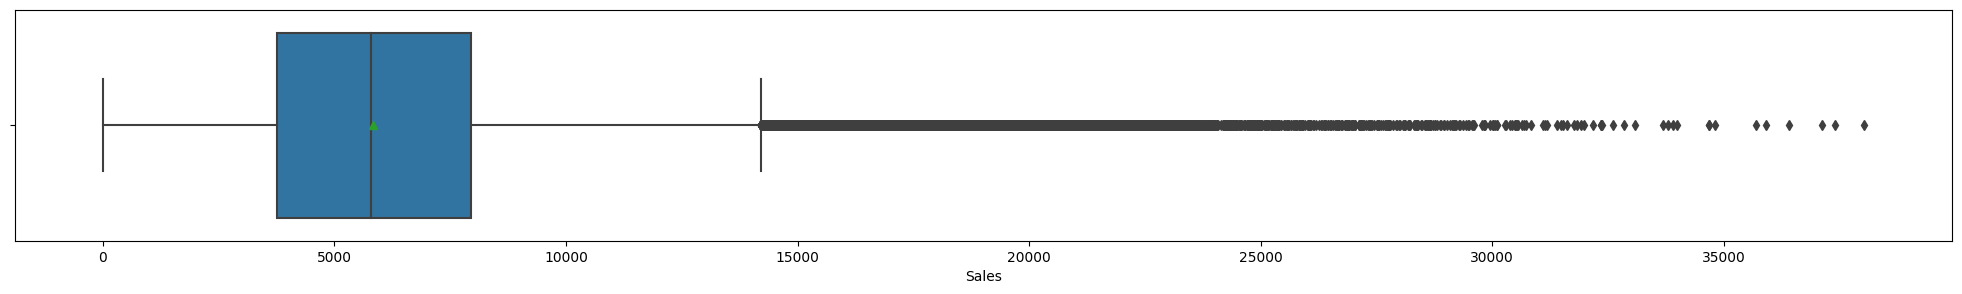

In [185]:

# Filtrar los valores atípicos
outliers = sales_history_df[(sales_history_df["Sales"] < (q1 - 1.5 * iqr)) | (sales_history_df["Sales"] > (q3 + 1.5 * iqr))]

# Crear el boxplot
plt.figure(figsize=(25, 3))
sns.boxplot(x=sales_history_df["Sales"], showmeans=True, orient='h')

plt.show()

## Se presenta una cantidad de valores anomalos que pueden verse afectados por la cantidad de valores en 0 que presenta la variable, se debe revisar como inputar los valores 0 de la variable para el analisis.

## Analisis univariado de la variable Customers

In [186]:
sales_history_df["Customers"].nunique()

3662

In [187]:
sales_history_df["Customers"].value_counts(dropna=False, normalize=True)

0       0.169769
646     0.002365
560     0.002340
528     0.002316
566     0.002311
          ...   
4687    0.000003
3726    0.000003
3269    0.000003
4115    0.000003
3663    0.000003
Name: Customers, Length: 3662, dtype: float64

## se presenta el mismo porcentaje de numero de usuarios para los días que se no se vendieron nada, fechas del 28/12/2013 a 04/01/2014.

In [188]:
q1 = sales_history_df["Customers"].quantile(0.25)
q3 = sales_history_df["Customers"].quantile(0.75)
iqr = q3 - q1

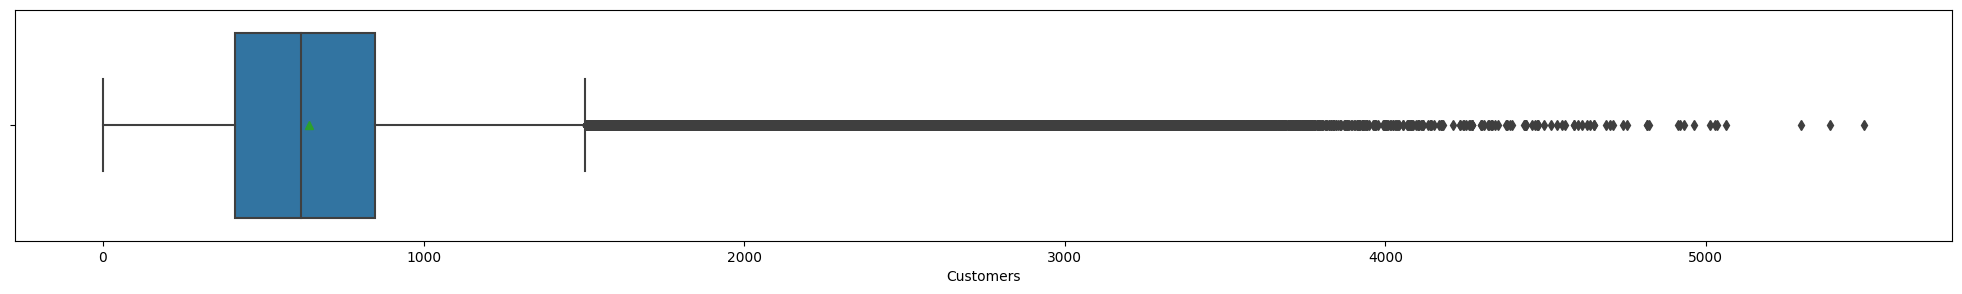

In [189]:
# Filtrar los valores atípicos
outliers = sales_history_df[(sales_history_df["Customers"] < (q1 - 1.5 * iqr)) | (sales_history_df["Customers"] > (q3 + 1.5 * iqr))]

# Crear el boxplot
plt.figure(figsize=(25, 3))
sns.boxplot(x=sales_history_df["Customers"], showmeans=True, orient='h')

plt.show()

## La variable presenta de acuerdo al analisis de quantiles varios valores outliers, tiene la misma tendencia que la variable Sales.

## Analisis de la variable OPEN

In [190]:
sales_history_df["Open"].nunique()

2

In [191]:
sales_history_df["Open"].value_counts(dropna=False, normalize=True)

1    0.830314
0    0.169686
Name: Open, dtype: float64

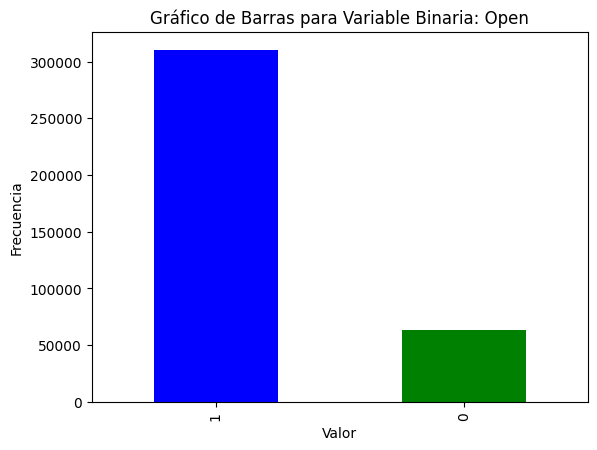

In [192]:
sales_history_df["Open"].value_counts().plot(kind='bar', color=['blue', 'green'])

# Etiquetas y título
plt.xlabel('Valor')
plt.ylabel('Frecuencia')
plt.title(f'Gráfico de Barras para Variable Binaria: Open')

# Mostrar el gráfico
plt.show()

## los establecimientos presentan un 80% mas de apertura que de cierre, lo que puede representar para aquellos que esten abiertos mayores ventas

## Analisis de la variable Store

In [193]:
sales_history_df["Store"].nunique()

1115

## Contamos con 1115 establecimientos disponibles

In [194]:
sales_history_df["Store"].value_counts(dropna=False, normalize=True)

1       0.000976
757     0.000976
743     0.000976
745     0.000976
746     0.000976
          ...   
385     0.000484
399     0.000484
407     0.000484
412     0.000484
1109    0.000484
Name: Store, Length: 1115, dtype: float64

## Se puede observar que hay mas cantidad de información para algunos establecimientos que para otros, por el porcentaje arrojado.

## Analisis de variable Promo

In [195]:
sales_history_df["Promo"].nunique()

2

In [196]:
sales_history_df["Promo"].value_counts(dropna=False, normalize=True)

0    0.618087
1    0.381913
Name: Promo, dtype: float64

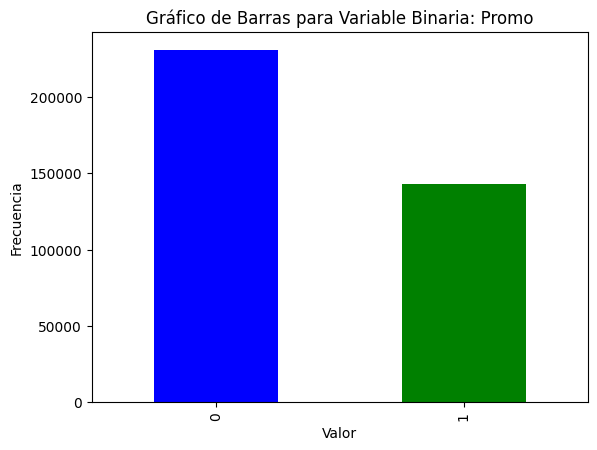

In [197]:
sales_history_df["Promo"].value_counts().plot(kind='bar', color=['blue', 'green'])

# Etiquetas y título
plt.xlabel('Valor')
plt.ylabel('Frecuencia')
plt.title(f'Gráfico de Barras para Variable Binaria: Promo')

# Mostrar el gráfico
plt.show()

## nos indica el analisis que en un 61% no se presentaron promociones en los establecimientos diferentes a promo2

## Inicio del analisis multivariado

<ipython-input-198-04394ef84425>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='nombre_dia', y='Sales', data=sales_history_df, ci=None)


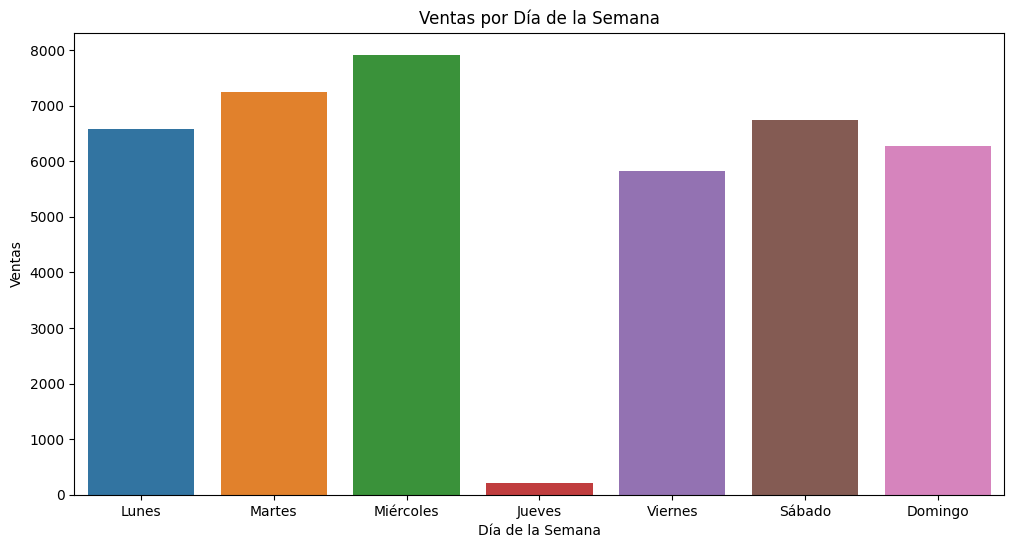

In [198]:
plt.figure(figsize=(12, 6))
sns.barplot(x='nombre_dia', y='Sales', data=sales_history_df, ci=None)

# Ajustar las etiquetas del eje x para que coincidan con los días de la semana
dias_semana = ['Lunes', 'Martes', 'Miércoles', 'Jueves', 'Viernes', 'Sábado', 'Domingo']
plt.xticks(ticks=range(7), labels=dias_semana)

# Agregar título y etiquetas a los ejes
plt.title('Ventas por Día de la Semana')
plt.xlabel('Día de la Semana')
plt.ylabel('Ventas')

# Mostrar el gráfico
plt.show()

## SE vende mas los días Miercoles y menos los días Jueves

<ipython-input-199-e6148613fafe>:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Mes', y='Sales', data=sales_history_df, ci=None, palette='viridis')


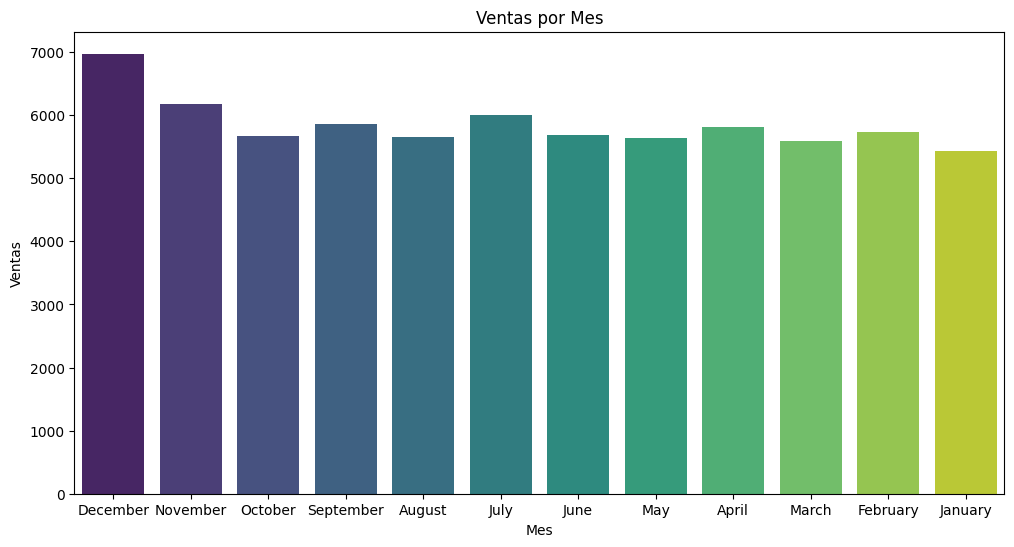

In [199]:
# Convertir la columna "Date" a tipo datetime
sales_history_df['Date'] = pd.to_datetime(sales_history_df['Date'])

# Extraer el mes de la fecha
sales_history_df['Mes'] = sales_history_df['Date'].dt.month_name()

# Crear un gráfico de barras
plt.figure(figsize=(12, 6))
sns.barplot(x='Mes', y='Sales', data=sales_history_df, ci=None, palette='viridis')

# Agregar título y etiquetas a los ejes
plt.title('Ventas por Mes')
plt.xlabel('Mes')
plt.ylabel('Ventas')

# Mostrar el gráfico
plt.show()

## Se venden mas los diciembres que el resto del año

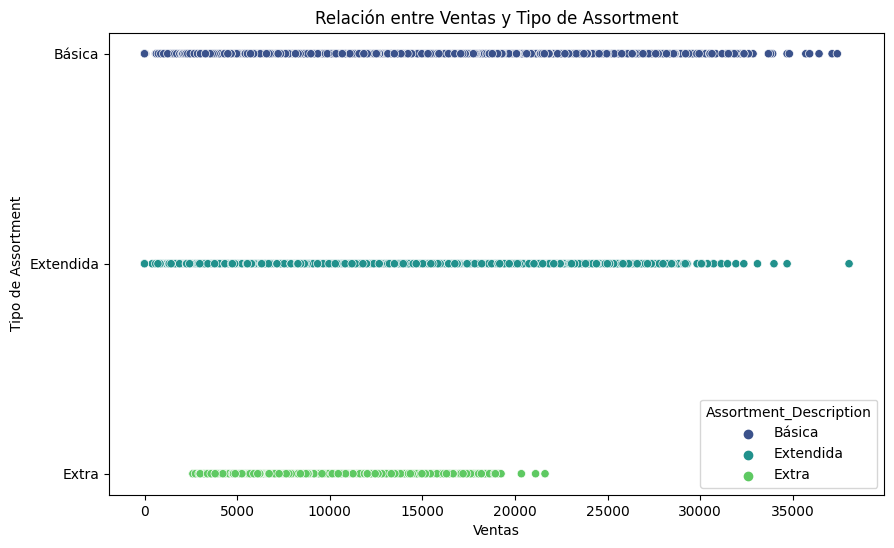

In [200]:
# Fusionar los DataFrames basándonos en la columna común "Store"
merged_df = pd.merge(sales_history_df, stores_df, on='Store', how='inner')

# Mapear las etiquetas de "Assortment" a etiquetas más descriptivas
assortment_mapping = {'a': 'Básica', 'b': 'Extra', 'c': 'Extendida'}
merged_df['Assortment_Description'] = merged_df['Assortment'].map(assortment_mapping)

# Crear un gráfico de dispersión para visualizar la relación entre "Sales" y "Assortment"
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Sales', y='Assortment_Description', data=merged_df, hue='Assortment_Description', palette='viridis')

# Agregar título y etiquetas a los ejes
plt.title('Relación entre Ventas y Tipo de Assortment')
plt.xlabel('Ventas')
plt.ylabel('Tipo de Assortment')

# Mostrar el gráfico
plt.show()

## El tipo de inventario que mas se vende es el inventario Basico.

## se inicia una calidad de datos para el entrenamiento

In [205]:
merged_df["Sales"].describe(percentiles=[.25, .5, .75, .95, .99])

count    373855.000000
mean       5833.290704
std        3883.887435
min           0.000000
25%        3760.000000
50%        5794.000000
75%        7941.000000
95%       12280.000000
99%       17236.000000
max       38037.000000
Name: Sales, dtype: float64

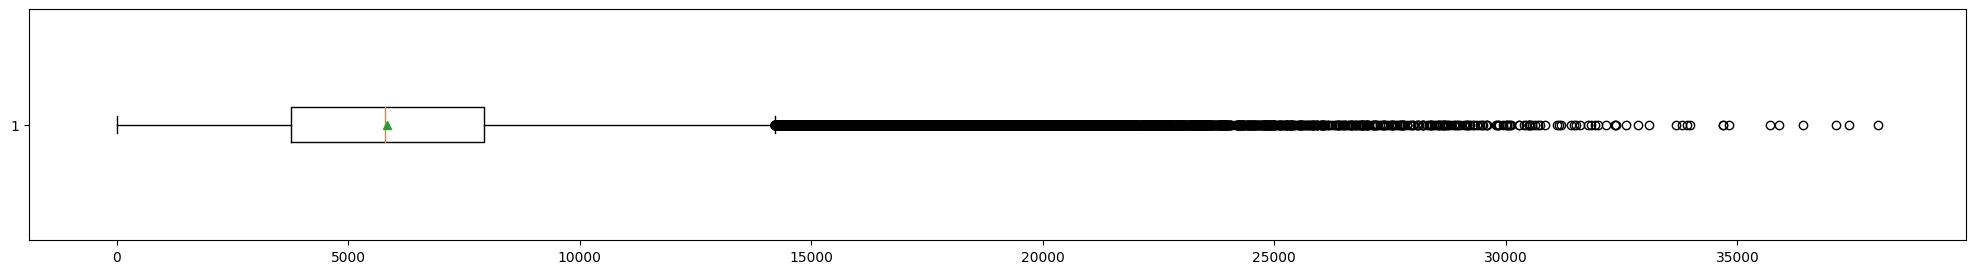

In [206]:
plt.figure(figsize=(25, 3))
plt.boxplot(merged_df["Sales"], showmeans=True, vert=False)
plt.show()

In [209]:
sales_no_outliers_df = merged_df.loc[merged_df["Sales"] <= merged_df["Sales"].quantile(.9)]

In [210]:
plt.figure(figsize=(25, 3))
plt.boxplot(sales_no_outliers_df["Sales"], showmeans=True, vert=False)
plt.show()

## Se realiza una depuración de valores outliers pafra la variable objetivo y asi tene run modelo mas aterrizado

In [211]:
# Calcular el porcentaje de valores NaN por columna
nan_percentage = stores_df.isnull().mean() * 100

# Imprimir los resultados
print("Porcentaje de valores NaN por columna:")
print(nan_percentage)

Porcentaje de valores NaN por columna:
Store                         0.000000
StoreType                     0.000000
Assortment                    0.000000
CompetitionDistance           0.269058
CompetitionOpenSinceMonth    31.748879
CompetitionOpenSinceYear     31.748879
Promo2                        0.000000
Promo2SinceWeek              48.789238
Promo2SinceYear              48.789238
PromoInterval                48.789238
dtype: float64


## Por criterio de diseño se entrenara el modelo con las variables del dt de stores adicionando al conjunto de datos CompetitionDistance, Promo2

In [212]:
# Calcular la media de las columnas
mean_promo2 = merged_df['Promo2'].mean()
mean_distance = merged_df['CompetitionDistance'].mean()

# Llenar los valores vacíos con la media
merged_df['Promo2'].fillna(mean_promo2, inplace=True)
merged_df['CompetitionDistance'].fillna(mean_distance, inplace=True)

# Calcular el porcentaje de valores NaN por columna
nan_percentage = merged_df.isnull().mean() * 100

# Imprimir los resultados
print("Porcentaje de valores NaN por columna:")
print(nan_percentage)


Porcentaje de valores NaN por columna:
Store                         0.000000
DayOfWeek                     0.000000
Date                          0.000000
Sales                         0.000000
Customers                     0.000000
Open                          0.000000
Promo                         0.000000
StateHoliday                  0.000000
SchoolHoliday                 0.000000
nombre_dia                    0.000000
day_of_week_num               0.000000
nombre_dia_from_date          0.000000
coincidencia                  0.000000
Mes                           0.000000
StoreType                     0.000000
Assortment                    0.000000
CompetitionDistance           0.000000
CompetitionOpenSinceMonth    31.854596
CompetitionOpenSinceYear     31.854596
Promo2                        0.000000
Promo2SinceWeek              51.930294
Promo2SinceYear              51.930294
PromoInterval                51.930294
Assortment_Description        0.000000
dtype: float64


## Corroboramos que nuestro Dataset y las variables a utilizar no tengan valores nulos debido a que es necesario para nuestro entrenamiento, las variables con valores mayores a un 20% de valores nulos son descartadas como features del entrenamiento, para las variables CompetitionDistance y Promo2 los valores nulos se completaron con la media de la variable correspondientemente.

In [227]:
features = ["DayOfWeek", "Customers", "Open", "Promo", "SchoolHoliday", "CompetitionDistance", "Promo2"]

In [228]:
corr = sales_no_outliers_df[features + ["Sales"]].corr()

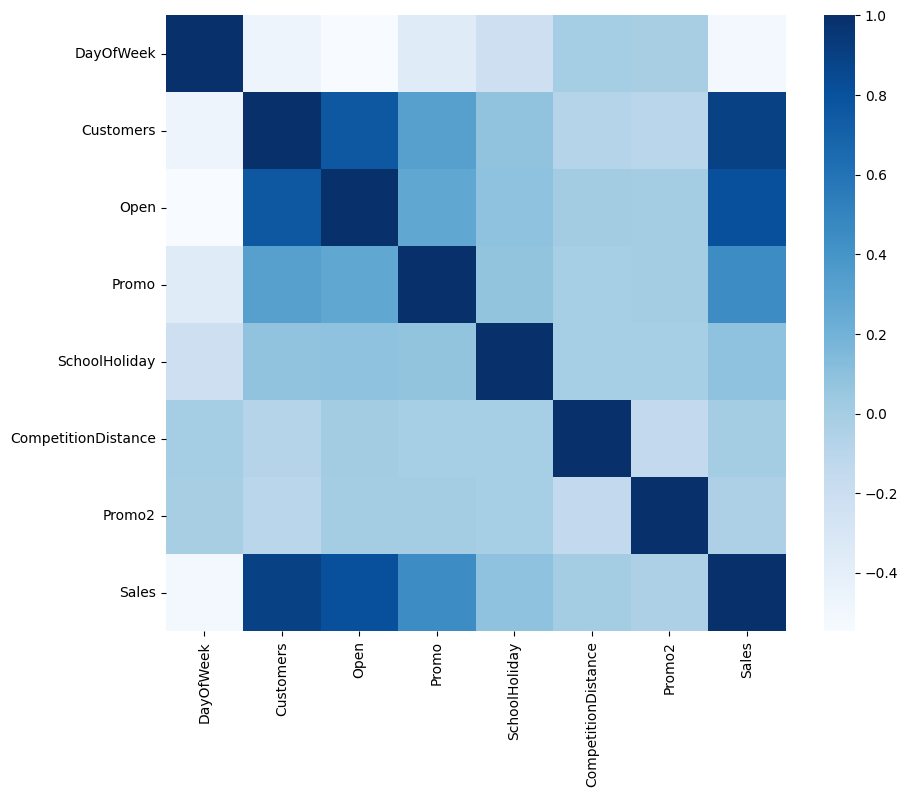

In [229]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr, cmap="Blues")
plt.show()

## Se cuenta con la primera imagen de correlación para las caracteristicas que se utilizaran en el entrenamiento del modelo.

### Separación de datasets de entrenamiento y pruebas.

In [230]:
merged_df.head()

Store  DayOfWeek       Date  Sales  Customers  Open  Promo  \
234693    773          4 2014-01-02   4577        657     1      0   
343264     72          4 2014-01-02   3448        419     1      0   
318278   1040          4 2014-01-02   7736        860     1      0   
54748     187          4 2014-01-02   5382        745     1      0   
325213   1062          4 2014-01-02   5483        587     1      0   

        StateHoliday  SchoolHoliday nombre_dia  day_of_week_num  \
234693           0.0              1     Jueves                4   
343264           0.0              1     Jueves                4   
318278           0.0              1     Jueves                4   
54748            0.0              1     Jueves                4   
325213           0.0              1     Jueves                4   

       nombre_dia_from_date  coincidencia      Mes StoreType Assortment  \
234693               Jueves          True  January         a          a   
343264               Jueves          True  January         a          a   
318278               Jueves          True  January         a          a   
54748                Jueves          True  January         a          c   
325213               Jueves          True  January         d          a   

        CompetitionDistance  CompetitionOpenSinceMonth  \
234693                200.0                        NaN   
343264               2200.0                       12.0   
318278               4030.0                        2.0   
54748               19360.0                        NaN   
325213                190.0                        9.0   

        CompetitionOpenSinceYear  Promo2  Promo2SinceWeek  Promo2SinceYear  \
234693                       NaN       0              NaN              NaN   
343264                    2009.0       1             13.0           2010.0   
318278                    2013.0       1             10.0           2014.0   
54748                        NaN       0              NaN              NaN   
325213                    2012.0       1             40.0           2012.0   

          PromoInterval Assortment_Description  
234693              NaN                 Básica  
343264  Jan,Apr,Jul,Oct                 Básica  
318278  Jan,Apr,Jul,Oct                 Básica  
54748               NaN              Extendida  
325213  Feb,May,Aug,Nov                 Básica

In [231]:
from sklearn.model_selection import train_test_split

# Asegúrate de tener la columna 'Date' en formato datetime
merged_df['Date'] = pd.to_datetime(merged_df['Date'])

# Ordena el DataFrame por la columna 'Date'
merged_df.sort_values(by='Date', inplace=True)

# Calcula el índice en el que se dividirá el conjunto de datos
split_index = int(0.7 * len(merged_df))

# Divide el conjunto de datos en entrenamiento y prueba
train_df = merged_df.iloc[:split_index]
test_df = merged_df.iloc[split_index:]

# Verifica las formas de los conjuntos de datos resultantes
print("Forma del conjunto de entrenamiento:", train_df.shape)
print("Forma del conjunto de prueba:", test_df.shape)





Forma del conjunto de entrenamiento: (253850, 24)
Forma del conjunto de prueba: (108794, 24)


In [232]:
train_df.head()

Store  DayOfWeek       Date  Sales  Customers  Open  Promo  \
234693    773          4 2014-01-02   4577        657     1      0   
146363    475          4 2014-01-02   6324       1021     1      0   
125558    408          4 2014-01-02   3765        399     1      0   
28833      93          4 2014-01-02   5173        576     1      0   
312803   1023          4 2014-01-02   4270        541     1      0   

        StateHoliday  SchoolHoliday nombre_dia  day_of_week_num  \
234693           0.0              1     Jueves                4   
146363           0.0              1     Jueves                4   
125558           0.0              1     Jueves                4   
28833            0.0              1     Jueves                4   
312803           0.0              1     Jueves                4   

       nombre_dia_from_date  coincidencia      Mes StoreType Assortment  \
234693               Jueves          True  January         a          a   
146363               Jueves          True  January         a          a   
125558               Jueves          True  January         c          a   
28833                Jueves          True  January         a          a   
312803               Jueves          True  January         c          a   

        CompetitionDistance  CompetitionOpenSinceMonth  \
234693                200.0                        NaN   
146363                140.0                        9.0   
125558               1560.0                        NaN   
28833               16690.0                        NaN   
312803               3740.0                        2.0   

        CompetitionOpenSinceYear  Promo2  Promo2SinceWeek  Promo2SinceYear  \
234693                       NaN       0              NaN              NaN   
146363                    2005.0       0              NaN              NaN   
125558                       NaN       1             45.0           2009.0   
28833                        NaN       1             14.0           2011.0   
312803                    2002.0       1             14.0           2011.0   

          PromoInterval Assortment_Description  
234693              NaN                 Básica  
146363              NaN                 Básica  
125558  Feb,May,Aug,Nov                 Básica  
28833   Jan,Apr,Jul,Oct                 Básica  
312803  Jan,Apr,Jul,Oct                 Básica

In [233]:
test_df.head()

Store  DayOfWeek       Date  Sales  Customers  Open  Promo  \
156340    510          2 2014-09-02   9946        962     1      1   
162545    531          2 2014-09-02   5597        734     1      1   
32605     106          2 2014-09-02   9828        945     1      1   
7055       23          2 2014-09-02   6777        541     1      1   
302705    991          2 2014-09-02   6540        557     1      1   

        StateHoliday  SchoolHoliday nombre_dia  day_of_week_num  \
156340           0.0              0     Martes                2   
162545           0.0              0     Martes                2   
32605            0.0              0     Martes                2   
7055             0.0              1     Martes                2   
302705           0.0              0     Martes                2   

       nombre_dia_from_date  coincidencia        Mes StoreType Assortment  \
156340               Martes          True  September         a          c   
162545               Martes          True  September         a          c   
32605                Martes          True  September         a          a   
7055                 Martes          True  September         d          a   
302705               Martes          True  September         a          a   

        CompetitionDistance  CompetitionOpenSinceMonth  \
156340               8260.0                        NaN   
162545               4030.0                        NaN   
32605                1390.0                        8.0   
7055                 4060.0                        8.0   
302705               1010.0                        NaN   

        CompetitionOpenSinceYear  Promo2  Promo2SinceWeek  Promo2SinceYear  \
156340                       NaN       0              NaN              NaN   
162545                       NaN       0              NaN              NaN   
32605                     2013.0       0              NaN              NaN   
7055                      2005.0       0              NaN              NaN   
302705                       NaN       0              NaN              NaN   

       PromoInterval Assortment_Description  
156340           NaN              Extendida  
162545           NaN              Extendida  
32605            NaN                 Básica  
7055             NaN                 Básica  
302705           NaN                 Básica

## se divide el dataset de acuerdo a las recomendaciónes de realizarlo por fechas y no aleatoriamente.

In [234]:
# Convertir las columnas a numérico, ignorando los errores
merged_df[features] = merged_df[features].apply(pd.to_numeric, errors='coerce')

# Eliminar filas con valores nulos en alguna de las columnas de características
merged_df = merged_df.dropna(subset=features)


In [241]:
# Entrenamiento
X_train = train_df[features].values
y_train = train_df["Sales"].values

# Prueba
X_test = test_df[features].values
y_test = test_df["Sales"].values

In [242]:
X_train.shape, y_train.shape

((253850, 7), (253850,))

In [243]:
X_test.shape, y_test.shape

((108794, 7), (108794,))

## Entrenamiento de mi primer modelo

In [244]:
regression = LinearRegression()

In [245]:
regression.fit(X_train, y_train)

LinearRegression()

In [247]:
pd.DataFrame({"columns": features, "coef": regression.coef_})

columns         coef
0            DayOfWeek   -70.865951
1            Customers     6.006702
2                 Open  1453.055657
3                Promo  1408.523789
4        SchoolHoliday    39.543267
5  CompetitionDistance     0.029616
6               Promo2   243.317893

In [248]:
regression.intercept_

202.75475266468675

In [251]:
print("Train:", mean_absolute_error(y_train, regression.predict(X_train)))
print("Test:", mean_absolute_error(y_test, regression.predict(X_test)))

Train: 964.9398724944124
Test: 1058.922046368738


In [252]:
print("Train:", np.sqrt(mean_squared_error(y_train, regression.predict(X_train))))
print("Test:", np.sqrt(mean_squared_error(y_test, regression.predict(X_test))))

Train: 1432.8826334604623
Test: 1568.1997357903492


## El error en el primer modelo es bastante alto, se procede a realizar regularización

In [253]:
scaler = StandardScaler()

In [254]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [255]:
regression = LinearRegression()

In [257]:
regression.fit(X_train_scaled, y_train)

LinearRegression()

In [259]:
coefficients_df = pd.concat([
    pd.Series(features),
    pd.Series(regression.coef_)
], axis=1).rename(columns={0: "feature", 1: "value"})
coefficients_df


feature        value
0            DayOfWeek  -142.130774
1            Customers  2726.906134
2                 Open   512.657406
3                Promo   680.973701
4        SchoolHoliday    15.502696
5  CompetitionDistance   228.980768
6               Promo2   121.653769

In [260]:
regression.intercept_

5876.5388851684065

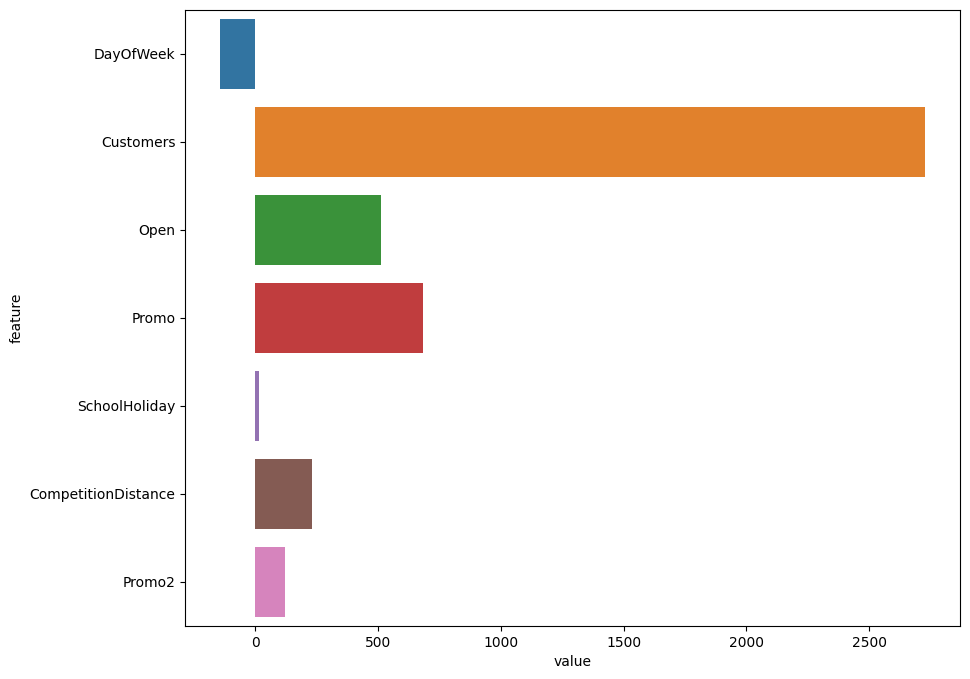

In [261]:
plt.figure(figsize=(10, 8))
sns.barplot(
    y=coefficients_df["feature"],
    x=coefficients_df["value"],
    orient="h"
)
plt.show()

In [262]:
print("Train:", mean_absolute_error(y_train, regression.predict(X_train_scaled)))
print("Test:", mean_absolute_error(y_test, regression.predict(X_test_scaled)))

Train: 964.9398724944275
Test: 1058.9220463687534


In [263]:
print("Train:", np.sqrt(mean_squared_error(y_train, regression.predict(X_train_scaled))))
print("Test:", np.sqrt(mean_squared_error(y_test, regression.predict(X_test_scaled))))

Train: 1432.8826334604623
Test: 1568.199735790344


## Se aplica regularización se pierde interpretación de variables y se mantiene el mismo error de entrenamiento.

In [267]:
sns.pairplot(pd.concat([X_train, y_train], axis=1), height=4, y_vars="incomeperperson", x_vars=features_training, kind="scatter")

TypeError: ignored